# Classification Exercise

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

In [199]:
import os
import shutil
os.getcwd()

'/Users/Gretel_MacAir/Documents/ML/6_TensorFlow/Tensorflow-Bootcamp-master/MyNotebooks/UdemyTensorflowCourse'

## 1. Loading the libraries and dataset

### THE LIBRARIES

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import time

### THE DATA

In [201]:
data = pd.read_csv('census_data.csv')

In [202]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Getting to know the data

In [203]:
# See other notebook

## 3. Prepping the data

### LABEL PREP

In [204]:
data['label'] = data['income_bracket'].apply(lambda x: 1 if x ==' >50K' else 0)

In [205]:
y_val = data['label']

### FEATURE COLUMN IDENTIFICATION

In [206]:
data.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
label              int64
dtype: object

In [207]:
cat_cols = data.select_dtypes('object').columns
num_cols = data.select_dtypes('int64').columns

In [208]:
cat_cols_list = list(cat_cols)
cat_cols_list.remove('income_bracket')
cat_cols_list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

In [209]:
num_cols_list = list(num_cols)
num_cols_list.remove('label')
num_cols_list

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [210]:
x_data_cols = []
for f in cat_cols_list:
    x_data_cols.append(f)
for f in num_cols_list:
    x_data_cols.append(f)

In [211]:
x_data = data[x_data_cols]

### TRAINING, DEV AND TEST SPLIT

In [212]:
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_val,
                                                    test_size=0.2, 
                                                    random_state=101)

X_train, X_dev, y_train, y_dev = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.25, 
                                                  random_state=101)

In [213]:
print(round(100.*len(X_train)/len(data),0))
print(round(100.*len(X_dev)/len(data),0))
print(round(100.*len(X_test)/len(data),0))

60.0
20.0
20.0


### FEATURE ENGINEERING

** Catergorical Features **

In [214]:
cat_cols_list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

In [215]:
cat_feat_list = []
cat_feat_dict = {}

In [216]:
for cat_col in cat_cols_list:
    voc_list = data[cat_col].value_counts().keys()
    cat_feat_dict[cat_col] = voc_list
    len_voc_list = len(voc_list)
    name = str(cat_col) + '_hash' 
    name = tf.feature_column.categorical_column_with_vocabulary_list(cat_col, voc_list)
    cat_feat_list.append(name)

** Continuous Features**

In [217]:
num_feat_list = []
for nf in num_cols_list:
    name = str(nf) + '_f'
    name = tf.feature_column.numeric_column(nf)
    num_feat_list.append(name)

** All Features **

In [218]:
feat_cols = cat_feat_list + num_feat_list

## 4. Training the first model

In [219]:
batch_size = 64
num_epochs = 10
steps = len(X_train)/batch_size*num_epochs
log_step_count_steps = steps/10

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size=batch_size,
                                                 num_epochs=num_epochs,
                                                 shuffle=True)

In [220]:
tf.logging.set_verbosity(tf.logging.INFO)
tf.estimator.RunConfig.log_step_count_steps = log_step_count_steps
print('''With a batch size of %d, 
a number of epochs of %d 
and a training set of size %d, 
the number of steps is: %d. 
Every %d step will be logged.''' %(batch_size,
                                   num_epochs,
                                   len(X_train),
                                   steps,
                                   log_step_count_steps))

With a batch size of 64, 
a number of epochs of 10 
and a training set of size 19536, 
the number of steps is: 3052. 
Every 305 step will be logged.


In [221]:
iter_num = str('010') # update to 011, 012, if you run this block again and want to keep each run in a separate folder
model_dir = '%s_tf_LinearClassifier_model' %(iter_num)

In [222]:
tf_LinearClassifier_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                                          n_classes=2,
                                                          model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '010_tf_LinearClassifier_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bc39c88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [223]:
tf.logging.set_verbosity(tf.logging.INFO)
tf.estimator.RunConfig.log_step_count_steps = log_step_count_steps

In [224]:
model_stats = []

In [225]:
start = time.time()
tf_LinearClassifier_model.train(input_fn=input_func,steps=steps)
end = time.time()
duration = end - start

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 010_tf_LinearClassifier_model/model.ckpt-36631
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 36632 into 010_tf_LinearClassifier_model/model.ckpt.
INFO:tensorflow:loss = 19.9987, step = 36632
INFO:tensorflow:global_step/sec: 134.951
INFO:tensorflow:loss = 15.7986, step = 36938 (2.269 sec)
INFO:tensorflow:global_step/sec: 246.461
INFO:tensorflow:loss = 20.9483, step = 37244 (1.241 sec)
INFO:tensorflow:global_step/sec: 218.878
INFO:tensorflow:loss = 17.6409, step = 37550 (1.398 sec)
INFO:tensorflow:global_step/sec: 283.829
INFO:tensorflow:loss = 14.0734, step = 37856 (1.079 sec)
INFO:tensorflow:global_step/sec: 278.655
INFO:tensorflow:loss = 11.1175, step = 38162 (1.098 sec)
INFO:tensorflow:global_step/sec: 295.683
INFO:t

### EVALUATING TRAINING AND DEV

** Evaluate **

In [226]:
train_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                            y=y_train,
                                                            batch_size=10,
                                                            num_epochs=1,
                                                            shuffle=False)
dev_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_dev,
                                                          y=y_dev,
                                                          batch_size=10,
                                                          num_epochs=1,
                                                          shuffle=False)

In [227]:
train_results = tf_LinearClassifier_model.evaluate(train_eval_input_func)
dev_results = tf_LinearClassifier_model.evaluate(dev_eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-15-09:22:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 010_tf_LinearClassifier_model/model.ckpt-39684
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-15-09:22:36
INFO:tensorflow:Saving dict for global step 39684: accuracy = 0.84741, accuracy_baseline = 0.760545, auc = 0.903069, auc_precision_recall = 0.753755, average_loss = 0.340783, global_step = 39684, label/mean = 0.239455, loss = 3.40713, precision = 0.717286, prediction/mean = 0.237892, recall = 0.59876
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-15-09:22:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 010_tf_LinearClassifier_model/model.ckpt-39684
INFO:tensorflow:Running local_init_op.
I

** Predict **

In [228]:
train_pred = tf_LinearClassifier_model.predict(train_eval_input_func)
train_predictions = [pred['class_ids'][0] 
                     for pred 
                     in train_pred]
train_pred = tf_LinearClassifier_model.predict(train_eval_input_func)
train_probabilities = [pred['probabilities'][0:2] 
                       for pred 
                       in train_pred]
dev_pred = tf_LinearClassifier_model.predict(dev_eval_input_func)
dev_predictions = [pred['class_ids'][0] 
                   for pred 
                   in dev_pred]
dev_pred = tf_LinearClassifier_model.predict(dev_eval_input_func)
dev_probabilities = [pred['probabilities'][0:2] 
                     for pred 
                     in dev_pred]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 010_tf_LinearClassifier_model/model.ckpt-39684
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 010_tf_LinearClassifier_model/model.ckpt-39684
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 010_tf_LinearClassifier_model/model.ckpt-39684
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 01

** Report **

In [229]:
print(classification_report(y_train, train_predictions))
print(classification_report(y_dev, dev_predictions))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     14858
          1       0.72      0.60      0.65      4678

avg / total       0.84      0.85      0.84     19536

             precision    recall  f1-score   support

          0       0.88      0.92      0.90      4890
          1       0.72      0.60      0.66      1622

avg / total       0.84      0.84      0.84      6512



In [230]:
train_confusion_mat = confusion_matrix(y_train, train_predictions)
dev_confusion_mat = confusion_matrix(y_dev, dev_predictions)
print(train_confusion_mat)
print(dev_confusion_mat)

[[13754  1104]
 [ 1877  2801]]
[[4512  378]
 [ 644  978]]


In [231]:
train_accuracy = (np.sum(train_confusion_mat * np.array([[1, 0], [0, 1]]) 
                         / np.sum(train_confusion_mat)))
print(train_accuracy)
dev_accuracy = (np.sum(dev_confusion_mat * np.array([[1, 0], [0, 1]]) 
                         / np.sum(dev_confusion_mat)))
print(dev_accuracy)

0.84740990991
0.843058968059


In [232]:
this_model_stats = {'model_dir': model_dir,
                    'batch_size': batch_size,
                    'num_epochs': num_epochs,
                    'steps': steps,
                    'duration': duration,
                    'train_accuracy': train_accuracy,
                    'dev_accuracy': dev_accuracy}

In [233]:
model_stats.append(this_model_stats)
model_stats

[{'model_dir': '010_tf_LinearClassifier_model',
  'batch_size': 64,
  'num_epochs': 10,
  'steps': 3052.5,
  'duration': 15.658601999282837,
  'train_accuracy': 0.84740990990990983,
  'dev_accuracy': 0.84305896805896796}]

In [235]:
model_stats_df = pd.DataFrame(model_stats)

In [237]:
model_stats_df.to_csv('model_stats.csv')

** Errors **

In [238]:
X_train_eval = X_train
X_train_eval = X_train_eval.assign(label=y_train.values)
X_train_eval = X_train_eval.assign(prediction_TFLC=pd.Series(train_predictions).values)
X_train_eval[((X_train_eval['label'] == 0) & (X_train_eval['prediction_TFLC'] == 1) |
             ((X_train_eval['label'] == 1)  & (X_train_eval['prediction_TFLC'] == 0)))]

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,age,education_num,capital_gain,capital_loss,hours_per_week,label,prediction_TFLC
3198,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,United-States,39,9,0,0,40,1,0
5815,Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,45,10,0,0,60,0,1
13781,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,United-States,39,13,0,0,40,1,0
26409,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,41,13,0,0,55,0,1
10709,?,Masters,Married-civ-spouse,?,Husband,White,Male,United-States,77,14,0,0,8,1,0
19041,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States,60,9,0,0,50,1,0
25361,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,35,9,3137,0,40,0,1
22436,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,31,13,0,0,50,0,1
25613,Private,Some-college,Separated,Sales,Not-in-family,White,Male,United-States,41,10,0,0,80,1,0
11434,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,46,9,0,0,40,1,0


In [239]:
X_dev_eval = X_dev
X_dev_eval = X_dev_eval.assign(label=y_dev.values)
X_dev_eval = X_dev_eval.assign(prediction=pd.Series(dev_predictions).values)
X_dev_eval[((X_dev_eval['label'] == 0) & (X_dev_eval['prediction'] == 1) |
           ((X_dev_eval['label'] == 1) & (X_dev_eval['prediction'] == 0)))]

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,age,education_num,capital_gain,capital_loss,hours_per_week,label,prediction
29836,Local-gov,Bachelors,Separated,Prof-specialty,Unmarried,White,Female,United-States,60,13,5455,0,55,0,1
13881,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,38,9,0,0,44,1,0
9824,Private,Masters,Divorced,Exec-managerial,Not-in-family,White,Female,United-States,63,14,0,0,40,1,0
6849,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,24,10,0,0,72,1,0
626,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States,34,9,0,0,45,1,0
1473,State-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,69,14,0,0,11,0,1
309,Self-emp-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,41,10,0,0,54,1,0
11906,Local-gov,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,United-States,45,14,0,0,50,1,0
29859,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,52,14,0,0,40,0,1
15388,Private,Bachelors,Never-married,Sales,Not-in-family,White,Male,United-States,35,13,0,0,40,1,0


## 5. Iterate in search for the best results

In [240]:
batch_size_iter = [64, 256]
num_epochs_iter = [20, 30]

In [241]:
num = 19
for bs in batch_size_iter:
    batch_size = bs
    for ne in num_epochs_iter:
        num_epochs = ne
        steps = len(X_train)/batch_size*num_epochs
        log_step_count_steps = steps/10
        tf.estimator.RunConfig.log_step_count_steps = log_step_count_steps
        print('''**** With a batch size of %d, a number of epochs of %d 
and a training set of size %d, the number of steps is: %d. 
Every %d step will be logged. ****''' %(batch_size,
                                   num_epochs,
                                   len(X_train),
                                   steps,
                                   log_step_count_steps))
        input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                         y=y_train,
                                                         batch_size=batch_size,
                                                         num_epochs=num_epochs,
                                                         shuffle=True)
        num += 1
        iter_num = str('0' + str(num))
        model_dir = '%s_tf_LinearClassifier_model' %(iter_num)
        tf_LinearClassifier_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                                                  n_classes=2,
                                                                  model_dir=model_dir)
        start = time.time()
        tf_LinearClassifier_model.train(input_fn=input_func,steps=steps)
        end = time.time()
        duration = end - start
        train_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                                    y=y_train,
                                                                    batch_size=10,
                                                                    num_epochs=1,
                                                                    shuffle=False)
        dev_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_dev,
                                                                  y=y_dev,
                                                                  batch_size=10,
                                                                  num_epochs=1,
                                                                  shuffle=False)
        train_pred = tf_LinearClassifier_model.predict(train_eval_input_func)
        train_predictions = [pred['class_ids'][0] for pred in train_pred]
        dev_pred = tf_LinearClassifier_model.predict(dev_eval_input_func)
        dev_predictions = [pred['class_ids'][0] for pred in dev_pred]
        train_confusion_mat = confusion_matrix(y_train, train_predictions)
        dev_confusion_mat = confusion_matrix(y_dev, dev_predictions)
        train_accuracy = (np.sum(train_confusion_mat * np.array([[1, 0], [0, 1]]) 
                          / np.sum(train_confusion_mat)))
        dev_accuracy = (np.sum(dev_confusion_mat * np.array([[1, 0], [0, 1]]) 
                        / np.sum(dev_confusion_mat)))
        this_model_stats = {'model_dir': model_dir,
                            'batch_size': batch_size,
                            'num_epochs': num_epochs,
                            'steps': steps,
                            'duration': duration,
                            'train_accuracy': train_accuracy,
                            'dev_accuracy': dev_accuracy}
        model_stats.append(this_model_stats)
        model_stats_df = pd.DataFrame(model_stats)
        model_stats_df.to_csv('model_stats.csv')

**** With a batch size of 64, a number of epochs of 20 
and a training set of size 19536, the number of steps is: 6105. 
Every 610 step will be logged. ****
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '020_tf_LinearClassifier_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11c58f438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Run

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
**** With a batch size of 256, a number of epochs of 30 
and a training set of size 19536, the number of steps is: 2289. 
Every 228 step will be logged. ****
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '023_tf_LinearClassifier_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11c219b00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:

### Choose best model and load it

In [242]:
model_stats_df

,batch_size,dev_accuracy,duration,model_dir,num_epochs,steps,train_accuracy
0,64,0.843059,15.658602,010_tf_LinearClassifier_model,10,3052.500,0.847410
1,64,0.838759,23.793541,020_tf_LinearClassifier_model,20,6105.000,0.842086
2,64,0.830774,31.900934,021_tf_LinearClassifier_model,30,9157.500,0.833282
3,256,0.818182,11.358199,022_tf_LinearClassifier_model,20,1526.250,0.825502
4,256,0.840909,14.266993,023_tf_LinearClassifier_model,30,2289.375,0.846233


In [243]:
model_dir = '023_tf_LinearClassifier_model'
config = tf.estimator.RunConfig(model_dir=model_dir)
tf_LinearClassifier_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                                          n_classes=2,
                                                          config=config,
                                                          model_dir=model_dir)

INFO:tensorflow:Using config: {'_model_dir': '023_tf_LinearClassifier_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11ca18048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## 6. Evaluating the model on test set

** Evaluate **

In [244]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [245]:
test_results = tf_LinearClassifier_model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-15-09:37:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 023_tf_LinearClassifier_model/model.ckpt-2290
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-15-09:37:23
INFO:tensorflow:Saving dict for global step 2290: accuracy = 0.846922, accuracy_baseline = 0.763396, auc = 0.899082, auc_precision_recall = 0.733319, average_loss = 0.364377, global_step = 2290, label/mean = 0.236604, loss = 3.63986, precision = 0.688889, prediction/mean = 0.246775, recall = 0.643738


** Predict **

In [246]:
test_predictions = tf_LinearClassifier_model.predict(test_input_func)

In [247]:
final_test_preds = [pred['class_ids'][0] 
                    for pred 
                    in test_predictions]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 023_tf_LinearClassifier_model/model.ckpt-2290
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Report **

In [248]:
print(classification_report(y_test, final_test_preds))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90      4972
          1       0.69      0.64      0.67      1541

avg / total       0.84      0.85      0.85      6513



In [249]:
print(confusion_matrix(y_test, final_test_preds))

[[4524  448]
 [ 549  992]]


** Errors **

In [250]:
X_test_eval = X_test
X_test_eval = X_test_eval.assign(label=y_test.values)
X_test_eval = X_test_eval.assign(prediction_TFLC=pd.Series(final_test_preds).values)
X_test_eval[((X_test_eval['label'] == 0) & (X_test_eval['prediction_TFLC'] == 1) |
            ((X_test_eval['label'] == 1)  & (X_test_eval['prediction_TFLC'] == 0)))]

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,age,education_num,capital_gain,capital_loss,hours_per_week,label,prediction_TFLC
27908,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,Poland,61,4,7688,0,40,1,0
12462,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,44,13,0,0,60,0,1
23054,Federal-gov,HS-grad,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,68,9,0,3683,40,0,1
3014,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,28,9,0,0,40,1,0
24916,Private,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,44,11,0,0,40,0,1
1981,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,49,9,0,0,40,1,0
6343,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,32,10,0,0,40,0,1
12415,Private,HS-grad,Married-spouse-absent,Sales,Not-in-family,White,Male,United-States,22,9,0,1719,40,0,1
31035,Private,Some-college,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,28,10,5013,0,55,0,1
16062,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,27,10,0,0,50,1,0


## 7. Visualizing feature weights

In [251]:
wt_names = tf_LinearClassifier_model.get_variable_names()

In [252]:
wt_vals = [tf_LinearClassifier_model.get_variable_value(name) for name in wt_names]

In [253]:
cat_feat_dict.keys()

dict_keys(['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country'])

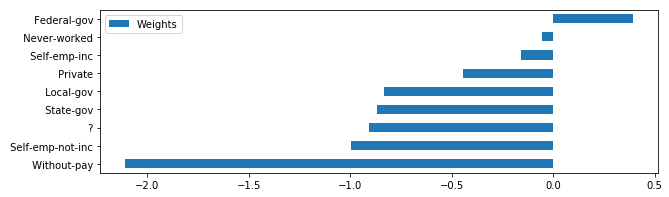

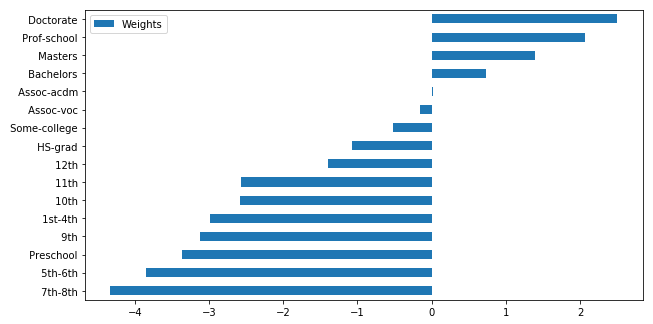

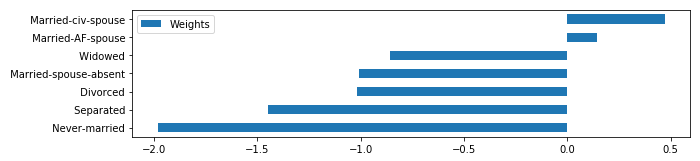

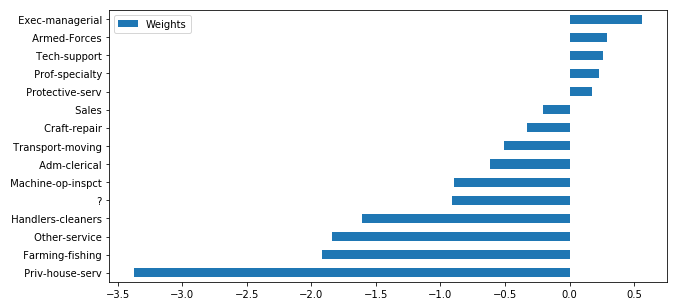

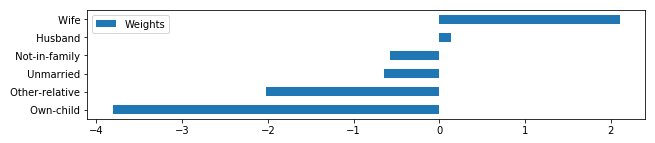

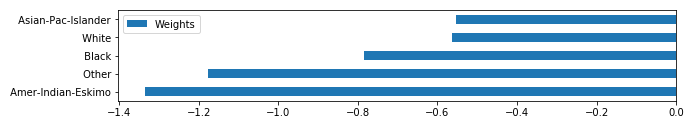

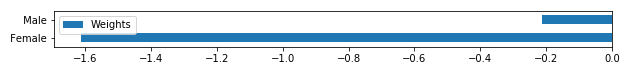

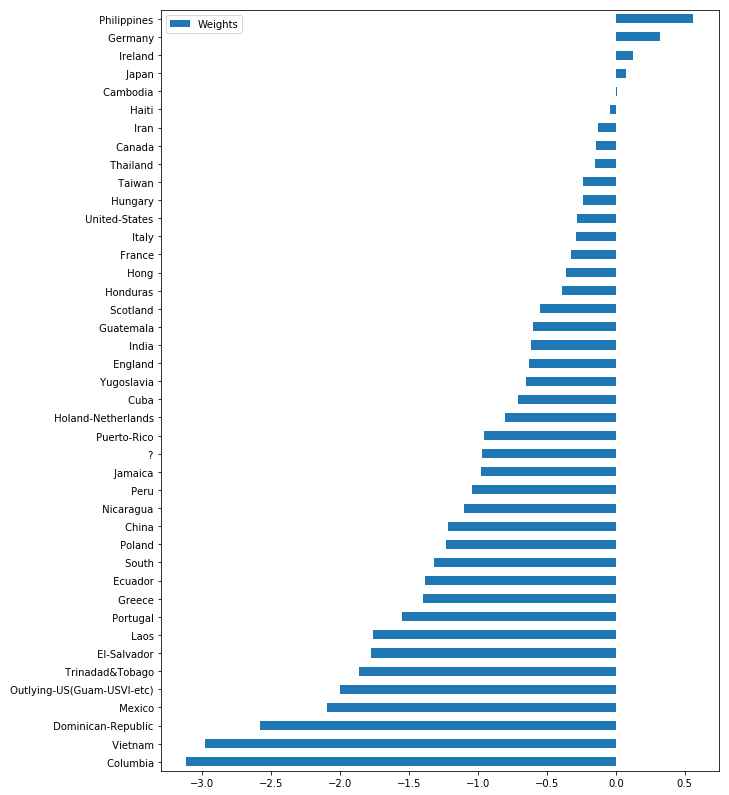

In [254]:
for cat_feat in cat_feat_dict.keys():
    weights = tf_LinearClassifier_model.get_variable_value('linear/linear_model/%s/weights' %(cat_feat)).flatten()
    keys = cat_feat_dict [cat_feat]
    height = len(keys)/3.
    pd.DataFrame({"Weights":weights},index=keys).sort_values("Weights",ascending=True).plot(kind="barh", figsize=(10,height)) 

In [255]:
features = []
weights = []

for num_feat in num_cols_list:
    features.append(num_feat)
    weight = tf_LinearClassifier_model.get_variable_value('linear/linear_model/%s/weights' %(num_feat)).flatten()[0]
    weights.append(weight)
    
num_feature_importance = pd.DataFrame({'features': features, 'weights': weights}).sort_values("weights",ascending=False)

In [256]:
num_feature_importance

,features,weights
4,hours_per_week,0.041212
0,age,0.028756
3,capital_loss,0.002885
2,capital_gain,0.000335
1,education_num,-0.106583


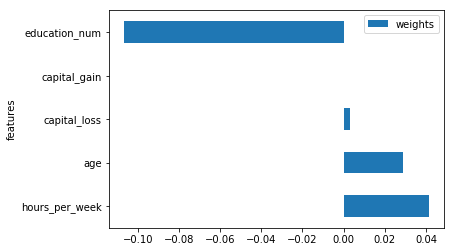

In [257]:
num_feature_importance.plot(kind='barh', x='features')